In [ ]:
#measuring the secondary path of the speaker to microphone

import pyaudio
import numpy as np
import time
import scipy.signal as sig
from matplotlib import pyplot as plt

#parameters
CHUNK = 2048
FORMAT = pyaudio.paFloat32
CHANNELS = 1
RATE = 44100

p = pyaudio.PyAudio()

freq = 528 #frequency of reference
x=np.arange(0,CHUNK,1) #for calculating the reference each iteration

response_frames = np.array([])
control_frames = np.array([])
control_frames = np.append(control_frames, np.zeros(CHUNK))

#measure the transfer function of the system
def main():
    
    total_responses = np.empty(2*RATE)
    total_controls = np.empty(2*RATE)
    
    for i in range(20):
    
        #open the audio stream
        stream = p.open(format=FORMAT,
                        channels=CHANNELS,
                        rate=RATE,
                        output=True,
                        input=True,
                        input_device_index = 1, 
                        output_device_index = 4, 
                        frames_per_buffer=CHUNK,
                        stream_callback=callback)

        #callback function is called while this loop waits
        stream.start_stream()
        while stream.is_active():
            time.sleep(1)
            stream.stop_stream()
        stream.close()
        
    np.savetxt('All response frames', response_frames)
    np.savetxt('All control frames', control_frames)
        
    p.terminate()

#called everytime there is new audio to record or play
def callback(in_data, frame_count, time_info, flag):
    global response_frames, control_frames, x, output_sin
    
    #record the audio through the microphone
    input_audio = in_data
    response_frames = np.append(response_frames, np.frombuffer(input_audio, dtype=np.float32))
    
    output_sin = 0.5*np.sin(2*np.pi*freq*(1/RATE)*x)
    x = x+CHUNK
    
    output_audio = output_sin
    control_frames = np.append(control_frames, output_audio)
    
    output = output_audio
    
    return (output.astype(np.float32).tobytes(), pyaudio.paContinue)

main()

In [ ]:
plt.plot(control_frames, 'b-', label = 'Control Signal')
plt.plot(response_frames, 'r-', label = 'Response Signal')
plt.title('Secondary Path Estimation')
plt.xlabel('Sample Number')
plt.xlabel('Sound Amplitude')
plt.legend()

In [ ]:
plt.plot(control_frames, 'b-', label = 'Control Signal')
plt.plot(response_frames, 'r-', label = 'Response Signal')
plt.xlim(31000, 32000)

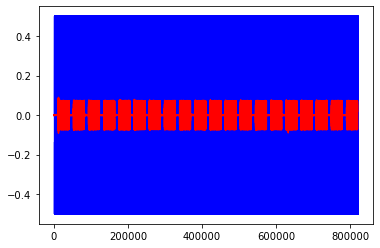

In [3]:
import numpy as np
from matplotlib import pyplot as plt

controls = np.loadtxt('All control frames')
responses = np.loadtxt('All response frames')

plt.plot(controls, 'b-')
plt.plot(responses, 'r-')